In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [23]:
#image = cv2.imread("horizontal_vertical.jpg")
image = cv2.imread("calendar.jpg")
cv2.imshow("Original",image)
cv2.waitKey()
cv2.destroyAllWindows()

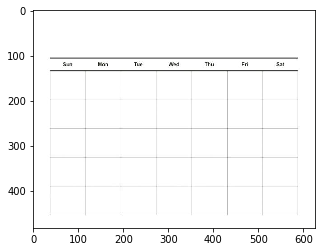

In [24]:
plt.imshow(image)

In [25]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray_image,50,200,apertureSize=3)
canny_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0, 255,   0],
       ...,
       [255,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [26]:
cv2.imshow("Canny image",canny_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
lines = cv2.HoughLines(canny_image,1,np.pi/180,300)

In [28]:
lines
#1.57 rad is almost 90 degrees

array([[[  0.       ,   1.5707964]],

       [[481.       ,   1.5707964]],

       [[105.       ,   1.5707964]],

       [[107.       ,   1.5707964]],

       [[198.       ,   1.5707964]],

       [[200.       ,   1.5707964]],

       [[261.       ,   1.5707964]],

       [[263.       ,   1.5707964]],

       [[389.       ,   1.5707964]],

       [[391.       ,   1.5707964]],

       [[453.       ,   1.5707964]],

       [[455.       ,   1.5707964]],

       [[136.       ,   1.5707964]],

       [[133.       ,   1.5707964]],

       [[  0.       ,   0.       ]],

       [[325.       ,   1.5707964]],

       [[327.       ,   1.5707964]],

       [[624.       ,   0.       ]],

       [[432.       ,   0.       ]],

       [[194.       ,   0.       ]],

       [[196.       ,   0.       ]],

       [[430.       ,   0.       ]],

       [[117.       ,   0.       ]],

       [[272.       ,   0.       ]],

       [[351.       ,   0.       ]],

       [[274.       ,   0.       ]],

       [[353

In [29]:
len(lines)

30

In [30]:
lines.shape

(30, 1, 2)

In [31]:
if lines is not None:
    for i in range(0,len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        
        x0 = rho*np.cos(theta)
        y0 = rho*np.sin(theta)
        
        a = np.cos(theta)
        b = np.sin(theta)
        
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)

cv2.imshow("Hough Lines",image)
cv2.waitKey()
cv2.destroyAllWindows()